In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\users_data.csv"
transactions_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\transactions_data.csv"
card_data_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\cards_data.csv"
mcc_codes_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\mcc_codes.json"
fraud_labels_path = r"C:\Users\soura\OneDrive\Desktop\Projects\Fraud Detection\data\train_fraud_labels.json"

In [3]:
transactions_data_df = pd.read_csv(transactions_data_path)

In [4]:
# Renaming in transactions_data_df
transactions_data_df.rename(columns={'id': 'transaction_id', 'client_id': 'client_id', 'card_id': 'card_id'}, inplace=True)

## DATA EXPLORATION ON TRANSACTIONS DATA

In [5]:
transactions_data_df.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [6]:
transactions_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   transaction_id  int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [7]:
# Remove non-numeric characters except for the negative sign (-)
transactions_data_df['amount'] = transactions_data_df['amount'].replace({r'[^\d.-]': ''}, regex=True)


# Convert the columns to numeric again
transactions_data_df['amount'] = pd.to_numeric(transactions_data_df['amount'], errors='coerce')


In [8]:
transactions_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   transaction_id  int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          float64
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.2+ GB


In [9]:
transactions_data_df.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [10]:
transactions_data_df.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [11]:
transactions_data_df.shape

(13305915, 12)

In [12]:
transactions_data_df.describe()

,transaction_id,client_id,card_id,amount,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.297604e+01,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,8.165575e+01,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,-5.000000e+02,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,8.930000e+00,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,2.899000e+01,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.371000e+01,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,6.820200e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [13]:
transactions_data_df.isnull().sum()

transaction_id           0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

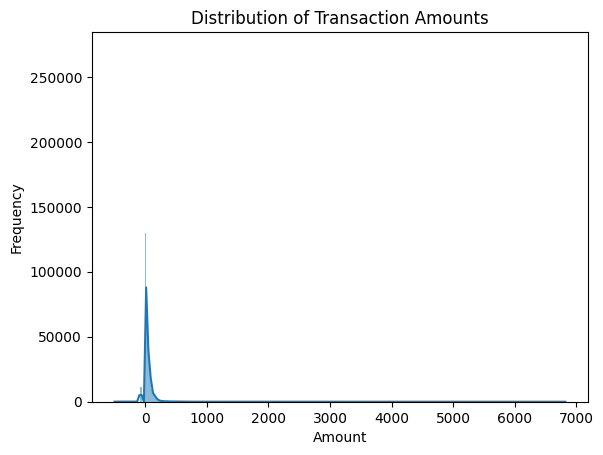

In [14]:
sns.histplot(transactions_data_df['amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


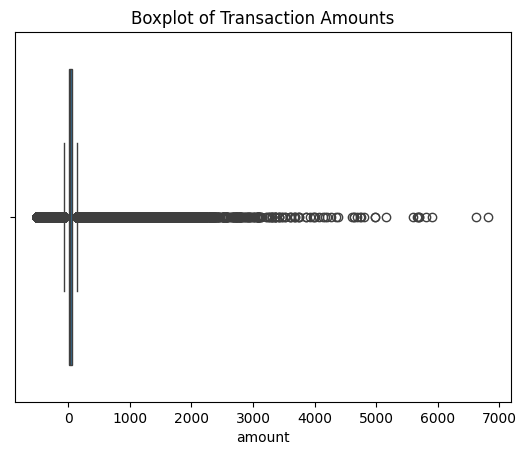

In [15]:
sns.boxplot(x=transactions_data_df['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()


In [16]:
print(transactions_data_df['errors'].value_counts())


errors
Insufficient Balance                                   130902
Bad PIN                                                 32119
Technical Glitch                                        26271
Bad Card Number                                          7767
Bad Expiration                                           6161
Bad CVV                                                  6106
Bad Zipcode                                              1126
Bad PIN,Insufficient Balance                              293
Insufficient Balance,Technical Glitch                     243
Bad Card Number,Insufficient Balance                       71
Bad PIN,Technical Glitch                                   70
Bad CVV,Insufficient Balance                               57
Bad Expiration,Insufficient Balance                        47
Bad Card Number,Bad CVV                                    38
Bad Card Number,Bad Expiration                             33
Bad Expiration,Bad CVV                                     32
B

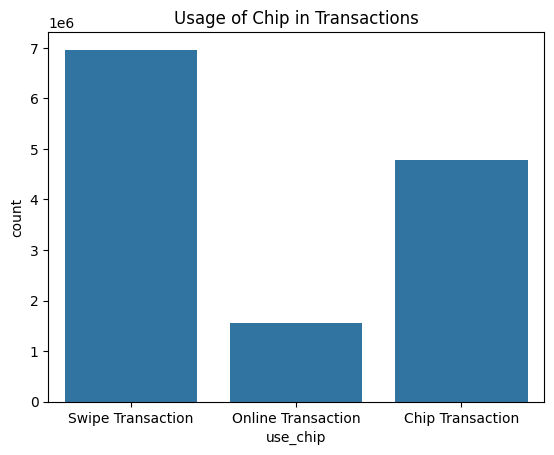

In [17]:
sns.countplot(x=transactions_data_df['use_chip'])
plt.title('Usage of Chip in Transactions')
plt.show()


In [18]:
print(transactions_data_df['merchant_id'].value_counts().head(10))


merchant_id
59935    610053
27092    589140
61195    562410
39021    440281
43293    362842
22204    347511
14528    333505
60569    301657
50783    298231
75781    273351
Name: count, dtype: int64


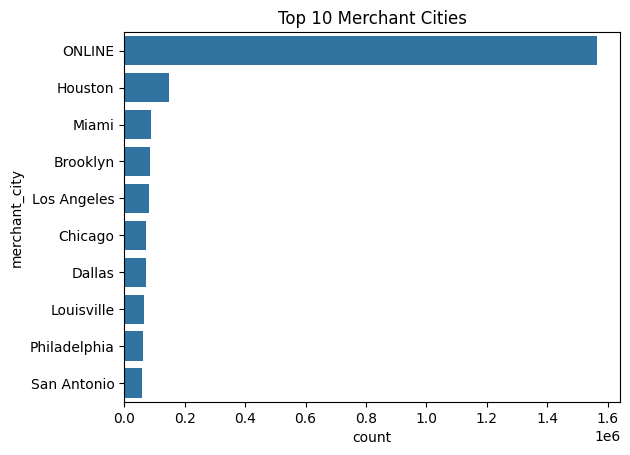

In [19]:
sns.countplot(y=transactions_data_df['merchant_city'], order=transactions_data_df['merchant_city'].value_counts().head(10).index)
plt.title('Top 10 Merchant Cities')
plt.show()


In [20]:
transactions_data_df['date'] = pd.to_datetime(transactions_data_df['date'], errors='coerce')


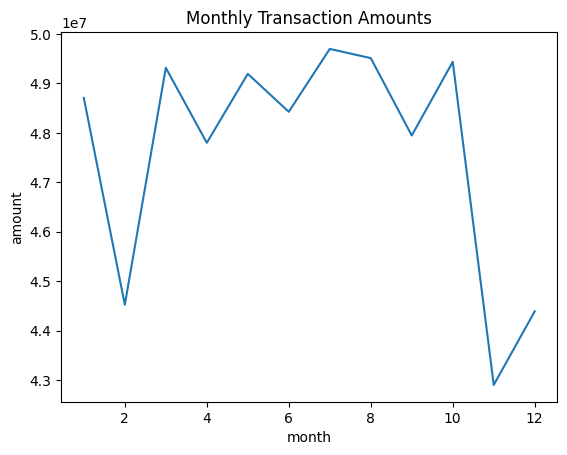

In [21]:
transactions_data_df['month'] = transactions_data_df['date'].dt.month
transactions_data_df['year'] = transactions_data_df['date'].dt.year

sns.lineplot(data=transactions_data_df.groupby('month')['amount'].sum().reset_index(), x='month', y='amount')
plt.title('Monthly Transaction Amounts')
plt.show()


In [22]:
client_summary = transactions_data_df.groupby('client_id')['amount'].sum().sort_values(ascending=False).head(10)
print(client_summary)


client_id
96      2445773.25
1686    2167880.90
1340    2039921.23
840     1956340.84
464     1882901.35
490     1711482.69
704     1635022.05
285     1615458.99
488     1611114.42
1168    1590822.75
Name: amount, dtype: float64


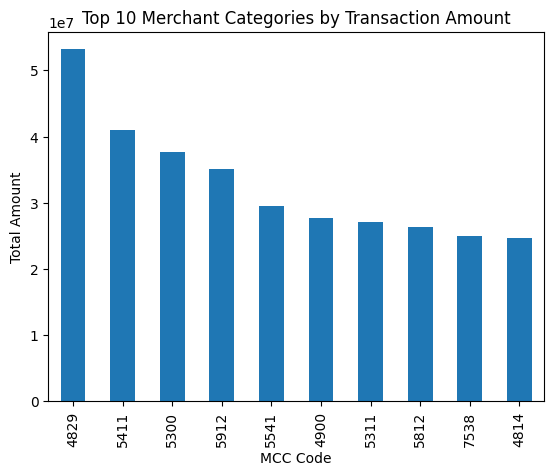

In [23]:
mcc_summary = transactions_data_df.groupby('mcc')['amount'].sum().sort_values(ascending=False).head(10)
mcc_summary.plot(kind='bar')
plt.title('Top 10 Merchant Categories by Transaction Amount')
plt.xlabel('MCC Code')
plt.ylabel('Total Amount')
plt.show()


In [24]:
print(transactions_data_df.isnull().sum())


transaction_id           0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
month                    0
year                     0
dtype: int64


In [25]:
## Outlier Detection

Q1 = transactions_data_df['amount'].quantile(0.25)
Q3 = transactions_data_df['amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = transactions_data_df[(transactions_data_df['amount'] < (Q1 - 1.5 * IQR)) | (transactions_data_df['amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

# Calculate the difference between the total number of transactions and the count of outliers
diff = len(transactions_data_df) - len(outliers)
print(f"Difference (Non-outliers): {diff}")

Number of outliers: 1052519
Difference (Non-outliers): 12253396


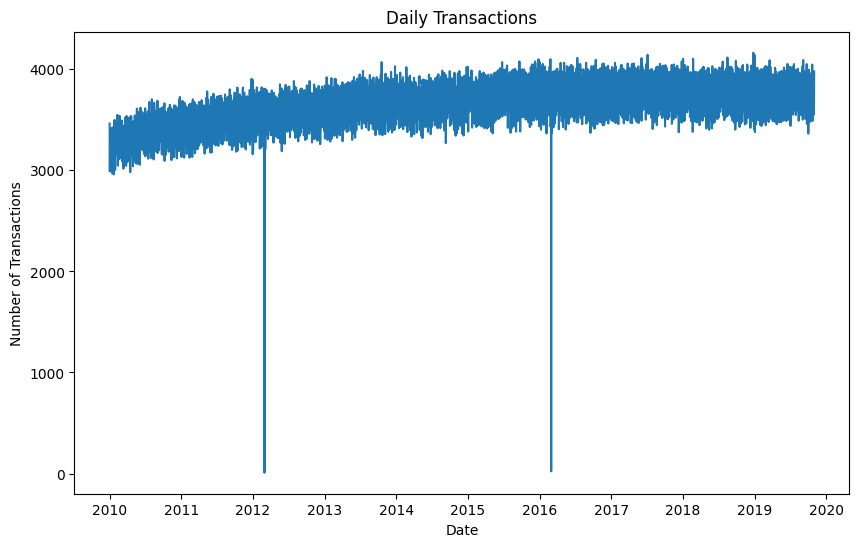

In [26]:
## Daily Transaction

transactions_data_df['date'] = pd.to_datetime(transactions_data_df['date'])
daily_transactions = transactions_data_df.groupby(transactions_data_df['date'].dt.date).size()
daily_transactions.plot(title='Daily Transactions', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()



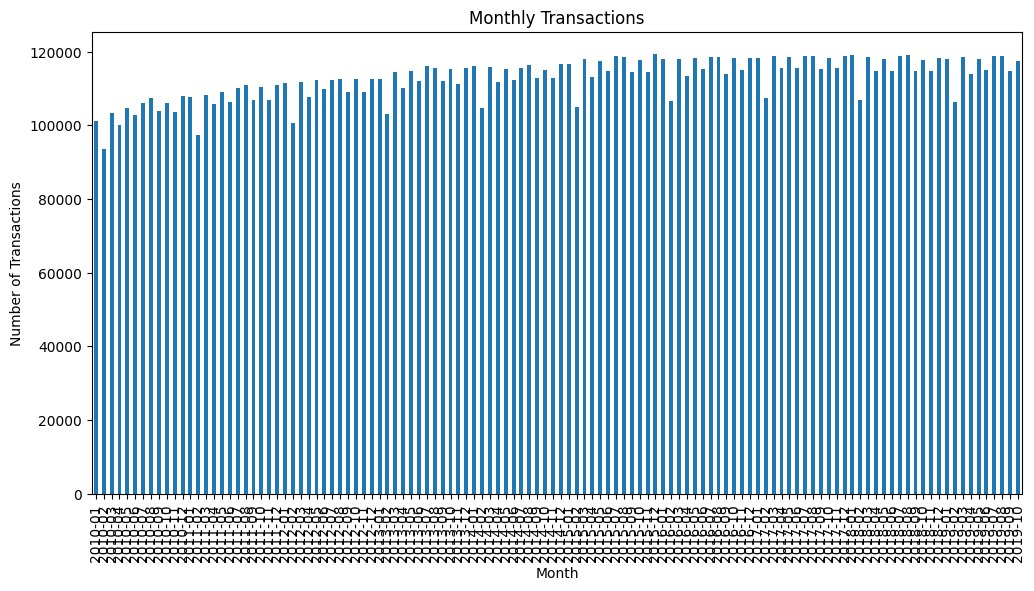

In [27]:
# Monthly Transactions

monthly_transactions = transactions_data_df.groupby(transactions_data_df['date'].dt.to_period('M')).size()
monthly_transactions.plot(kind='bar', title='Monthly Transactions', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


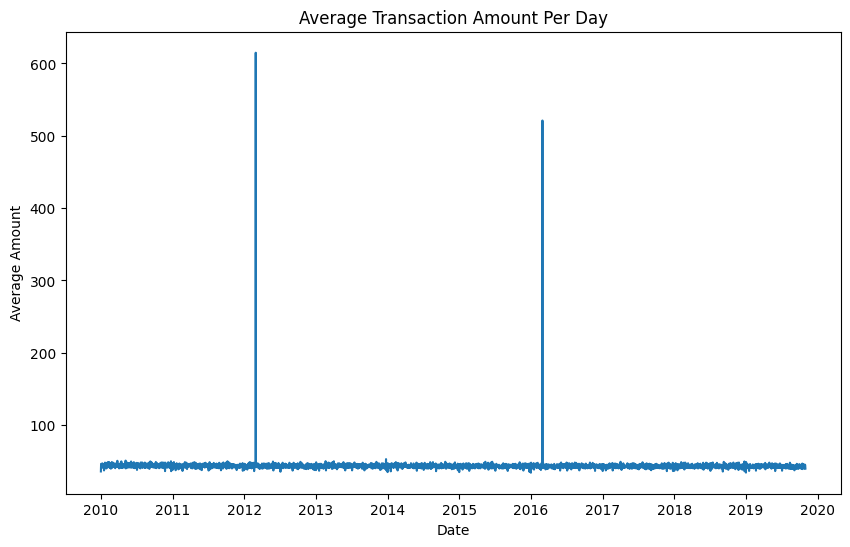

In [28]:
# Daily/Monthly Averages

daily_avg_amount = transactions_data_df.groupby(transactions_data_df['date'].dt.date)['amount'].mean()
daily_avg_amount.plot(title='Average Transaction Amount Per Day', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Average Amount')
plt.show()


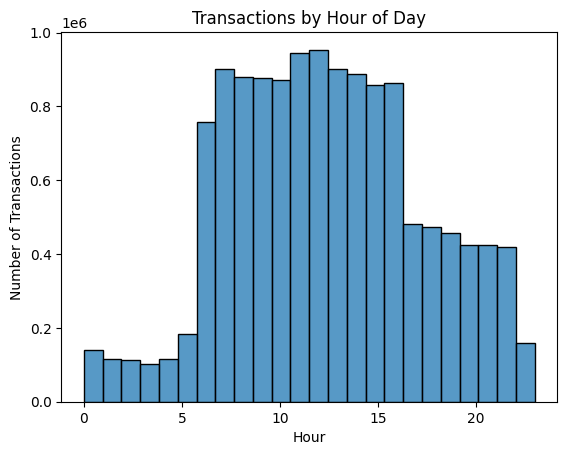

In [29]:
# Extract the hour from the timestamp to analyze the distribution of transactions during the day.

transactions_data_df['hour'] = transactions_data_df['date'].dt.hour
sns.histplot(transactions_data_df['hour'], bins=24, kde=False)
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()


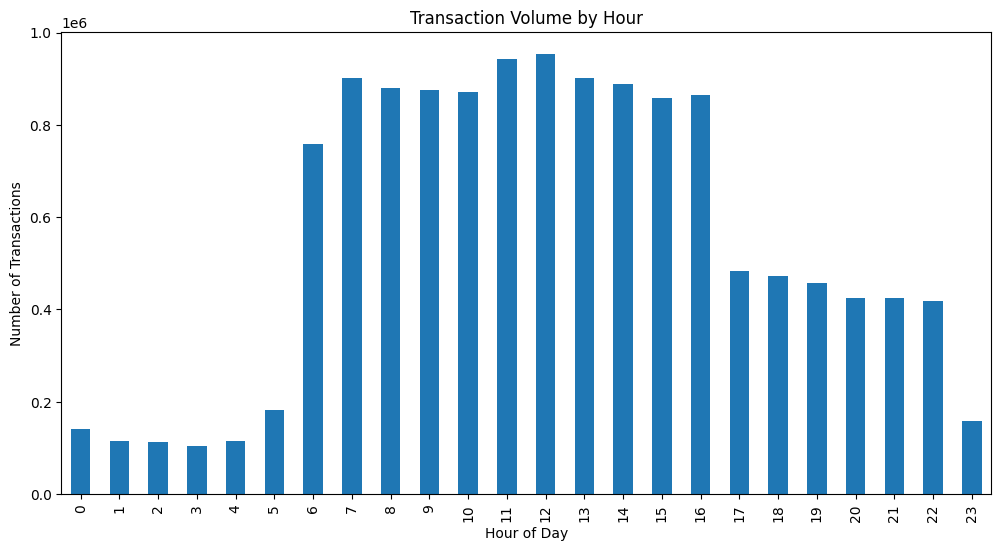

In [30]:
# Identify times when transaction volume is highest or lowest

peak_hours = transactions_data_df['hour'].value_counts().sort_index()
peak_hours.plot(kind='bar', figsize=(12, 6))
plt.title('Transaction Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()


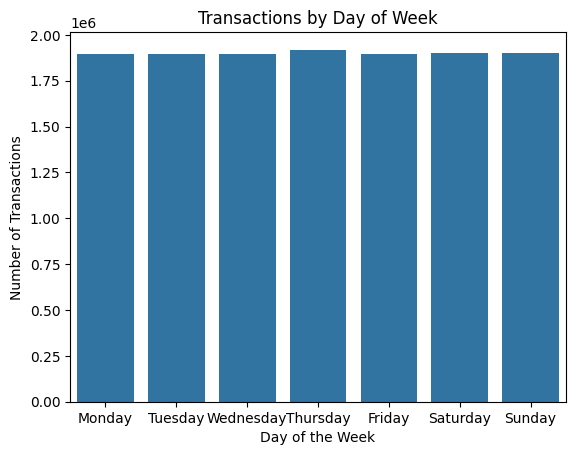

In [31]:
# Day of Week Patterns 

transactions_data_df['day_of_week'] = transactions_data_df['date'].dt.day_name()
sns.countplot(x='day_of_week', data=transactions_data_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transactions by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


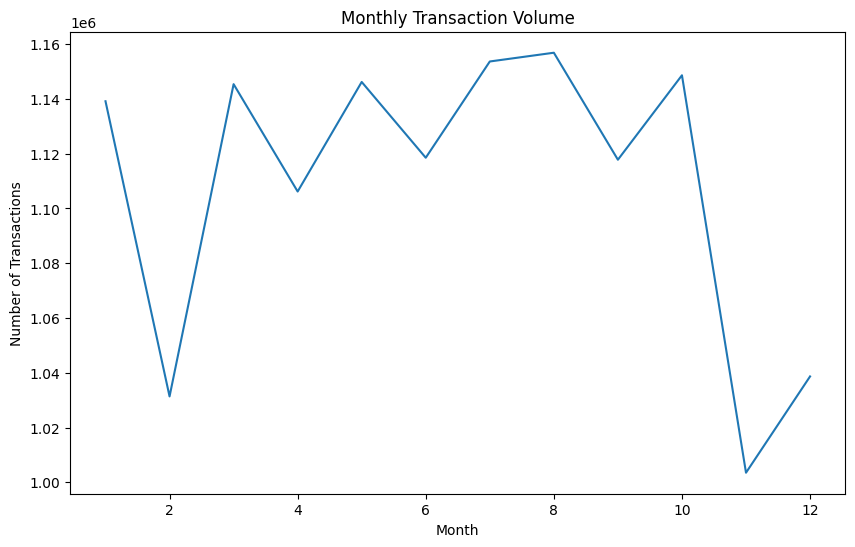

In [32]:
## Seasonal Trends

transactions_data_df['month'] = transactions_data_df['date'].dt.month
monthly_volume = transactions_data_df.groupby('month').size()
monthly_volume.plot(kind='line', title='Monthly Transaction Volume', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()


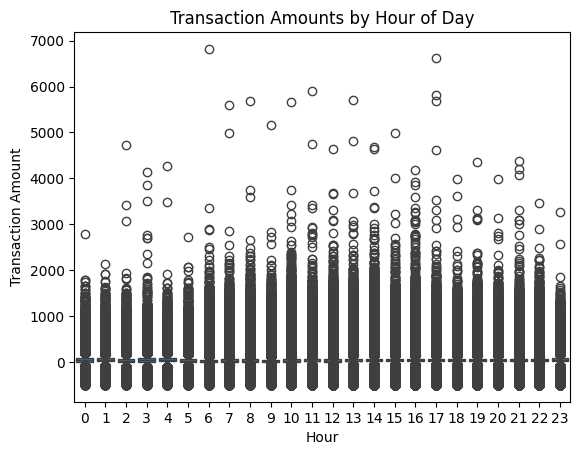

In [33]:
## Boxplot of Amounts by Hour

sns.boxplot(x='hour', y='amount', data=transactions_data_df)
plt.title('Transaction Amounts by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Transaction Amount')
plt.show()


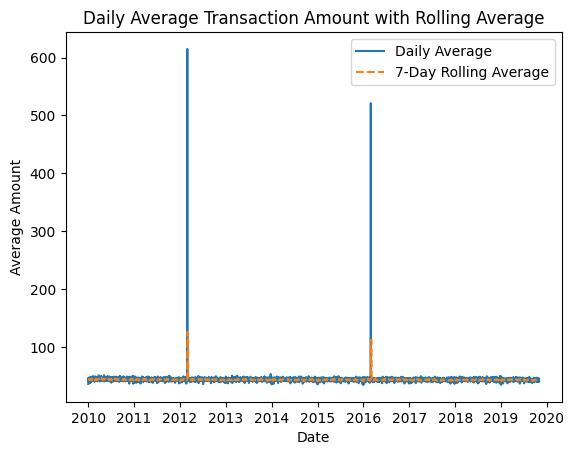

In [34]:
## rolling averages to detect unusual spikes or dips in transaction amounts

daily_avg_amount = transactions_data_df.groupby(transactions_data_df['date'].dt.date)['amount'].mean()
rolling_avg = daily_avg_amount.rolling(window=7).mean()
plt.plot(daily_avg_amount, label='Daily Average')
plt.plot(rolling_avg, label='7-Day Rolling Average', linestyle='--')
plt.title('Daily Average Transaction Amount with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Average Amount')
plt.legend()
plt.show()


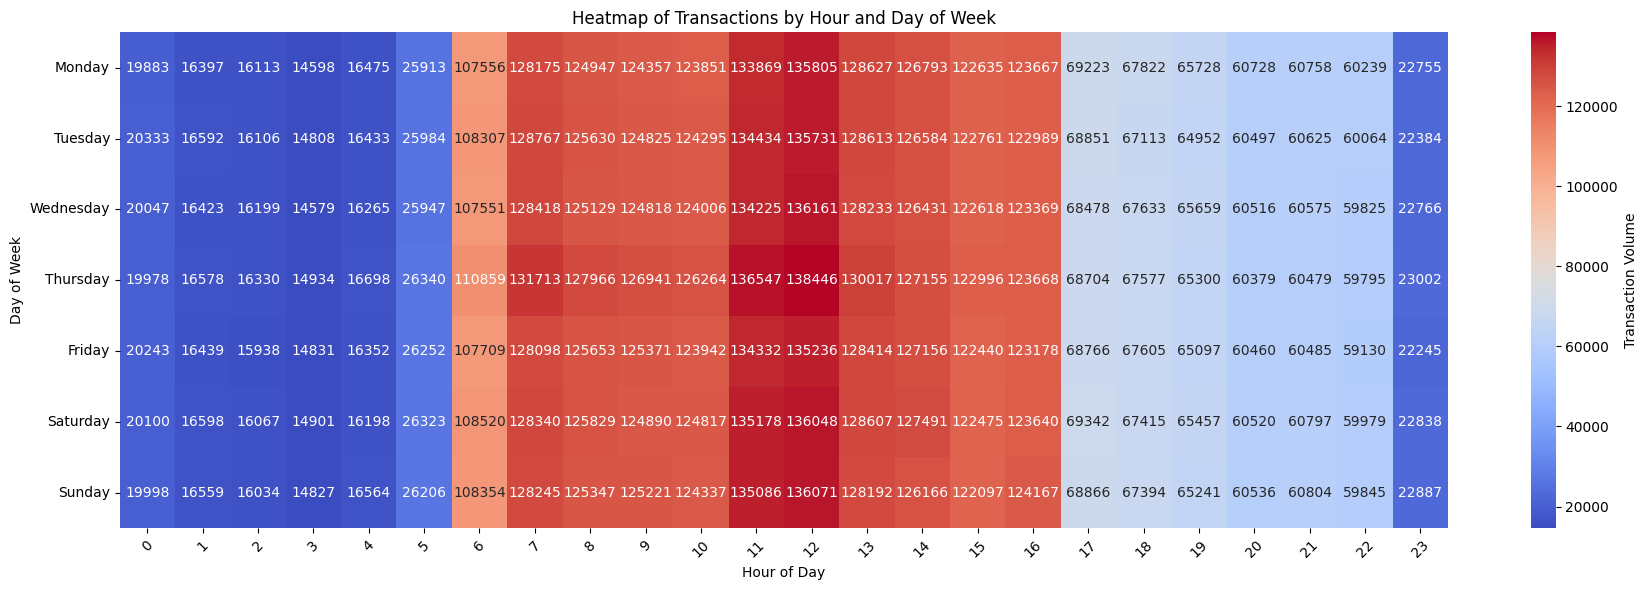

In [35]:
# heatmap to show transaction volume by hour and day of the week

# Ensure the days of the week are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for the heatmap
heatmap_data = transactions_data_df.pivot_table(
    index=transactions_data_df['date'].dt.day_name(),
    columns='hour',
    values='transaction_id',
    aggfunc='count'
).reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(18, 6))  # Adjust size for better readability
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Transaction Volume'})
plt.title('Heatmap of Transactions by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [36]:
transactions_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   transaction_id  int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
 12  month           int32         
 13  year            int32         
 14  hour            int32         
 15  day_of_week     object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(5)
memory usage: 1.4+ GB


In [37]:
# Calculate skewness for numerical columns in the transactions_data_df
numerical_columns = ['amount']  
skewness_values = transactions_data_df[numerical_columns].skew()

# Display skewness
print("Skewness of Numerical Columns:")
print(skewness_values)


Skewness of Numerical Columns:
amount    5.22112
dtype: float64


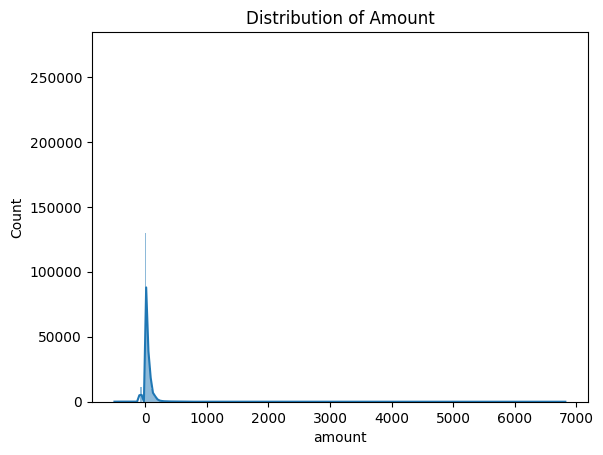

In [38]:
sns.histplot(transactions_data_df['amount'], kde=True)
plt.title('Distribution of Amount')
plt.show()

positive skewness means that extreme high values (outliers) are pulling the mean higher than the median.

In [39]:
# Remove outliers based on IQR
transactions_data_df_cleaned = transactions_data_df[~((transactions_data_df['amount'] < (Q1 - 1.5 * IQR)) | (transactions_data_df['amount'] > (Q3 + 1.5 * IQR)))]

# Check the number of rows before and after removal
print(f"Original number of rows: {len(transactions_data_df)}")
print(f"Number of rows after removing outliers: {len(transactions_data_df_cleaned)}")

Original number of rows: 13305915
Number of rows after removing outliers: 12253396


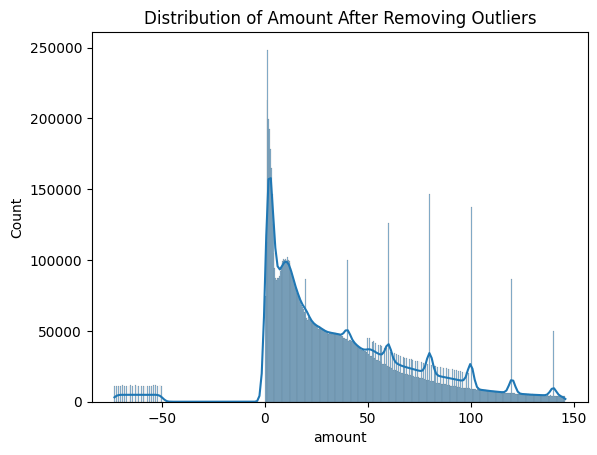

In [40]:
# Visualize the distribution of 'amount' after removing outliers
sns.histplot(transactions_data_df_cleaned['amount'], kde=True)
plt.title('Distribution of Amount After Removing Outliers')
plt.show()


In [41]:
transactions_data_df_cleaned.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,month,year,hour,day_of_week
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,1,2010,0,Friday
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,1,2010,0,Friday
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,1,2010,0,Friday
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,1,2010,0,Friday
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,1,2010,0,Friday


In [42]:
transactions_data_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12253396 entries, 1 to 13305914
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   transaction_id  int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             int64         
 11  errors          object        
 12  month           int32         
 13  year            int32         
 14  hour            int32         
 15  day_of_week     object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(5)
memory usage: 1.4+ GB
